# Open Data Repositories

- UC Urvine ML Repository: https://archive.ics.uci.edu/ml/index.php
- Kaggle: https://www.kaggle.com/datasets
- Wiki: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research

# Exploratory Data Analysis
- initial investigation
- understand various aspects of the data
- clean data  
- no missing values
- remove redundancies
- remove noise
- identify faulty points
- identify important features
- relationship between features
- find (hidden) structures or patterns
- find anomolies
- determine outliers
- use statistical tools and graphs
- derive conclusions about the insight of the data

## Steps of EDA
- Understand the Data
- Clean the Data
    - handling missing values
- Relationship between features

## Important Libraries
- pandas
- numpy
- seaborn
- matplotlib

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# California Housing Dataset

## Import and prepare data

In [ ]:
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

In [ ]:
# keys of boston_dataset bunch
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
# description of the data
print(california_dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# define a dataframe
# column names = feature names of bunch
# values       = data of bunch

df = pd.DataFrame(columns = california_dataset.feature_names, data = california_dataset.data)

In [ ]:
#### add also the target values as a new column and give he name MEDV to the columns
df['MEDV'] = california_dataset.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
def dataset_prep(dataset, target_name='Target'):
    _ = pd.DataFrame(columns =dataset().feature_names, data = dataset().data)
    _[target_name] = dataset().target
    return _

In [ ]:
dataset_prep(fetch_california_housing, target_name='MEDV').head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

## Quick Look
- Understand the data
- Take quick look at the data by using the  head() method  
- Each row describes a block in California

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
df['Age'] = pd.cut(df['HouseAge'], bins=[0,20,40,60], labels=['new', 'moderate', 'old'])
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV       Age  
0    -122.23  4.526       old  
1    -122.22  3.585  moderate  
2    -122.24  3.521       old  
3    -122.25  3.413       old  
4    -122.25  3.422       old

In [ ]:
# number of unique svalues
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
MEDV           3842
Age               3
dtype: int64

In [ ]:
df.Age.nunique()

3

In [ ]:
df.Age.value_counts()

moderate    10469
new          6293
old          3878
Name: Age, dtype: int64

In [ ]:
df.Age.unique()

['old', 'moderate', 'new']
Categories (3, object): ['new' < 'moderate' < 'old']

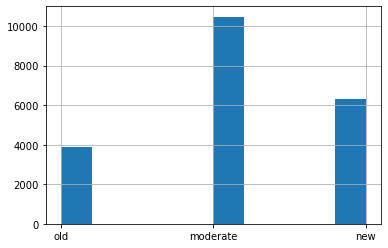

In [ ]:
# you can use this for stratified sampling)
df.Age.hist();

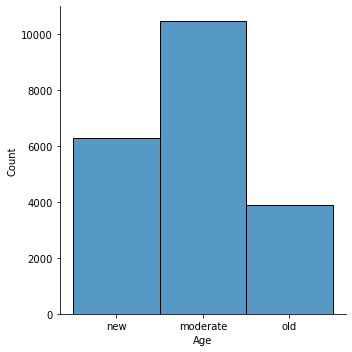

In [ ]:
import seaborn as sns
sns.displot(data=df.Age);

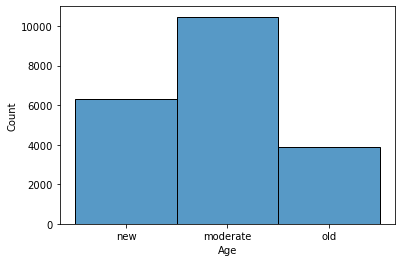

In [ ]:
sns.histplot(data=df.Age);

In [ ]:
 df.shape

(20640, 10)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'Age'],
      dtype='object')

In [ ]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'Age'],
      dtype='object')


In [ ]:
# better form
print(df.columns.format())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV', 'Age']


__Categorical DATA__
- No categorical data in the original dataset: No Repetition in any data type
- Age is categorical

__Conclusion:__
1. Each row represents a district  
2. There are 20640 instances (samples)  
3. There are 9 attributes (features)  (Age is added)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']
4. the last one is the dependent variable and the rest are independent variables.

## Description
Take a quick description of the data by using the info() method

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MedInc      20640 non-null  float64 
 1   HouseAge    20640 non-null  float64 
 2   AveRooms    20640 non-null  float64 
 3   AveBedrms   20640 non-null  float64 
 4   Population  20640 non-null  float64 
 5   AveOccup    20640 non-null  float64 
 6   Latitude    20640 non-null  float64 
 7   Longitude   20640 non-null  float64 
 8   MEDV        20640 non-null  float64 
 9   Age         20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [ ]:
df.shape

(20640, 10)

In [ ]:
# only numbers
df.select_dtypes(exclude=['category']).shape

(20640, 9)

In [ ]:
# checkth enumber of missing values in each column
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
Age           0
dtype: int64

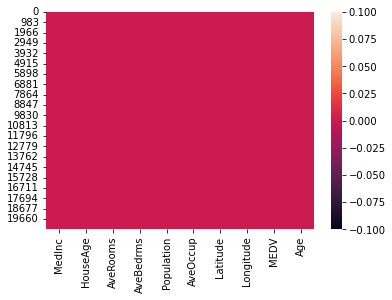

In [ ]:
sns.heatmap(df.isnull());

__Conclusion:__
1. Datatypes: Float (They are all numerical)  
2. Non null values: No missing values
3. Number of columns(attributes): 9
4. Number of rows (instances): 20640  
4. Column (attribute) names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']
5. Memory usage: 1.4 MB

__Summary of the Numerical Values__
- It shows count, mean, standard deviation, minimum, 25th percentile, 50th percintile (median), 75th percentile and maximum of each column.
- 25th percentile (first quartile) is the median of the data less than the over all median
- 50th percentile is the median of the whole data
- 75th percentile (third quartile) is the median of the data greater than the over all median

In [ ]:
df.describe().round(2)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude      MEDV  
count  20640.00   20640.00  20640.00  
mean      35.63    -119.57      2.07  
std        2.14       2.00      1.15  
min       32.54    -124.35      0.15  
25%       33.93    -121.80      1.20  
50%       34.26    -118.49      1.80  
75%       37.71    -118.01      2.65  
max       41.95    -114.31      5.00

__CONCLUSIONS:__
- There is  a large difference between 75th percentile and maximum values as in  
MedInc, HouseAge, AveRooms,, AveBedrms, Population, AveOccup, MEDV
- That means there are some outliers.

## Histogram

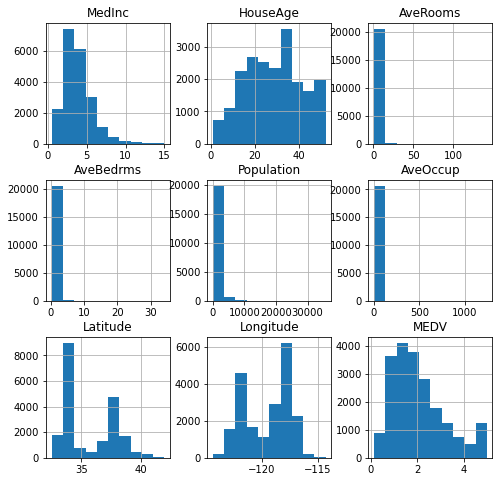

In [ ]:
df.hist(figsize=(8,8));

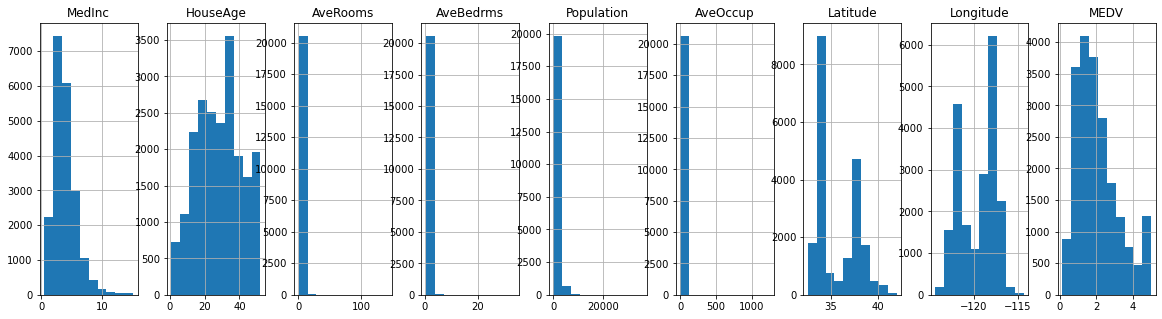

In [ ]:
df.hist(figsize=(20,5), layout=(1,9));

 __CONCLUSION:__
- MEDV values are between 0.15 and 5 so it is not the actual valued
    - Since values are large MEDV data is sclaed and capped at 5
    - Right skewed
    - Huge spike at the end
- MedInc values are between 0.50 and 15 so it is not the actual valued
    - Since values are large MedInc data is scaled and capped at 15  
- Houseage is also capped
- Attributes have different scales. They need to be rescaled, This wil be covered later.
- Some attributes are right skewed. To improve the efficiency of the ML algorithms
  these data should be tranformed into a bell shaped distributions.
- __Left Skewed:__ NA
- __Right Skewed:__   MEDINC, MEDV
    - Apply log transformation to the right skewed ones
    - Square the left skewed ones

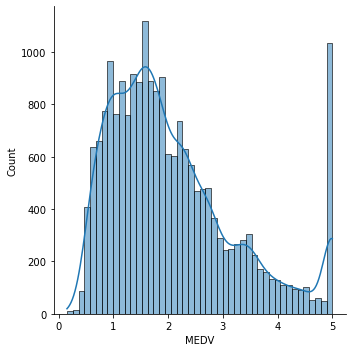

In [ ]:
sns.displot(df['MEDV'], kde=True);

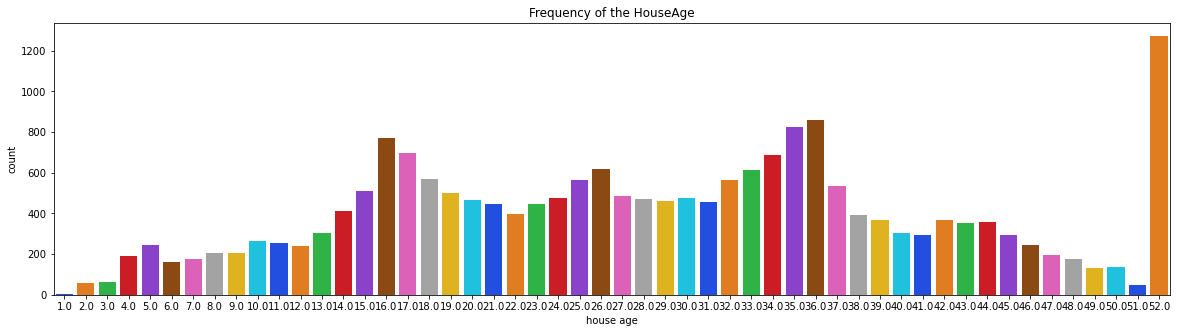

In [ ]:
# deep, rocket
# sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='HouseAge',  palette='bright').set(title = 'Frequency of the HouseAge', xlabel = 'house age');

## Visualization

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'Age'],
      dtype='object')

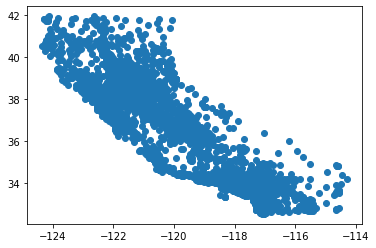

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'],df['Latitude']);

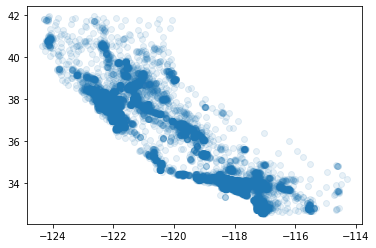

In [ ]:
# better to see high density areas
plt.scatter(df['Longitude'],df['Latitude'],alpha=0.1);

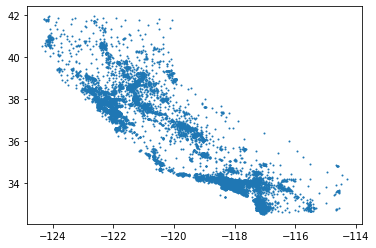

In [ ]:
#change marker size
plt.scatter(df['Longitude'],df['Latitude'],s=1);

In [ ]:
# coloring according to MedInc
I = df['MedInc'].values
I=I/max(I)

# decrease the size as population increases so income color will be more visible
P = df['Population'].values
P = P/max(P)


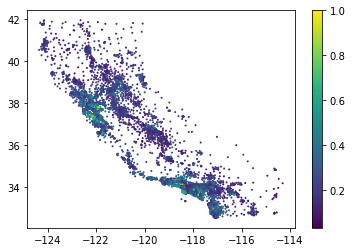

In [ ]:
plt.scatter(df['Longitude'],df['Latitude'],s=1 ,c=I)
plt.colorbar();

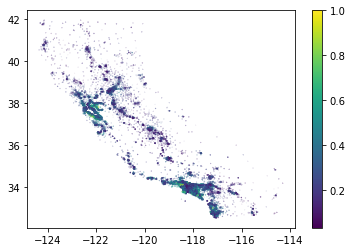

In [ ]:
plt.scatter(df['Longitude'],df['Latitude'],s=P ,c=I)
plt.colorbar();

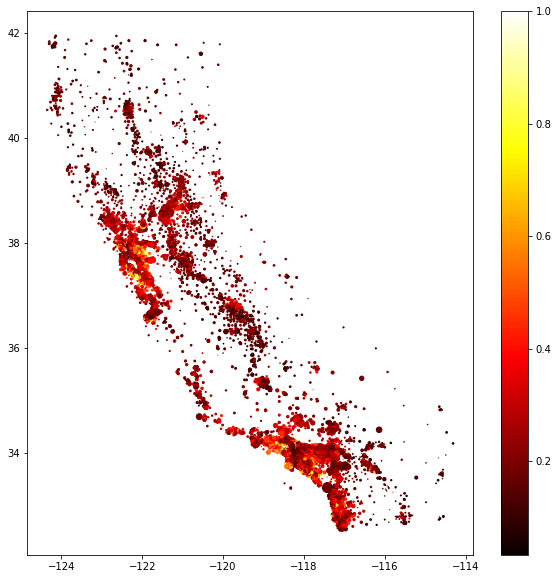

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['Longitude'],df['Latitude'],s=P*100 ,c=I, cmap='hot')
plt.colorbar();

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'Age'],
      dtype='object')

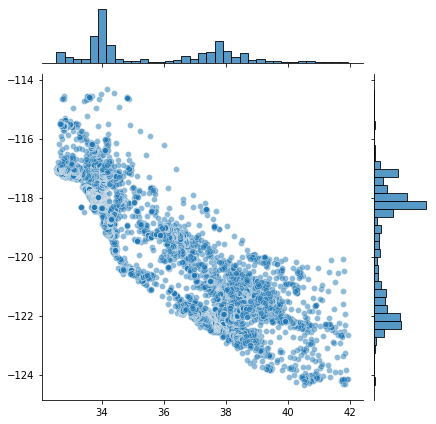

In [ ]:
sns.jointplot(x=df.Latitude.values,y=df.Longitude.values, alpha=0.5);

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'Age'],
      dtype='object')

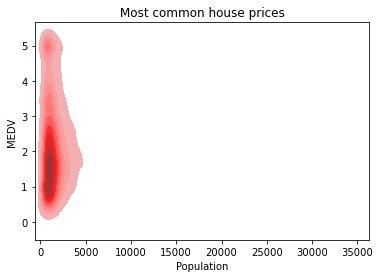

In [ ]:
sns.kdeplot(x='Population', y='MEDV', data=df, fill="True", color="red").set(title = "Most common house prices",
                                                                             xlabel = "Population",
                                                                            ylabel = "MEDV");

In [ ]:
!pip install folium

In [ ]:
data = [[y,x] for x,y in df[['Longitude','Latitude']].values]
data[:5]

[[37.88, -122.23],
 [37.86, -122.22],
 [37.85, -122.24],
 [37.85, -122.25],
 [37.85, -122.25]]

In [ ]:
import folium
from folium import plugins

In [ ]:
cal_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 5)
plugins.HeatMap(data, radius=15).add_to(cal_map)
cal_map

## Boxplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

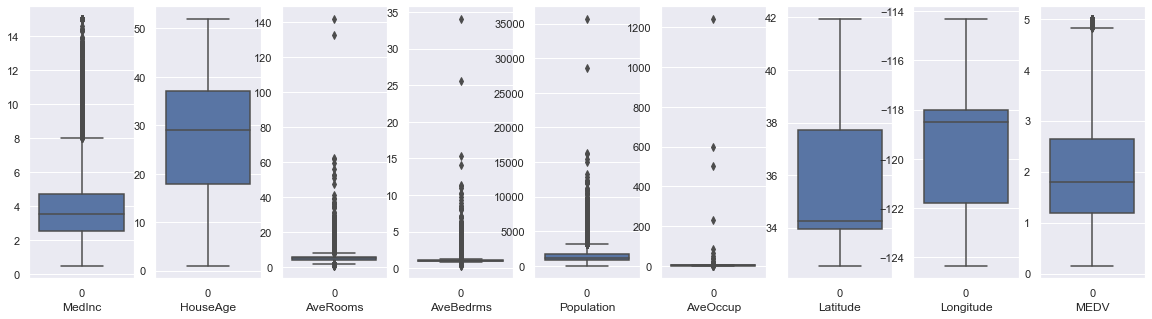

In [ ]:
plt.figure(figsize = (20, 5))

for i in range(1,10):
    plt.subplot(1,9, i)
    sns.boxplot( data = df.iloc[:,i-1])
    plt.xlabel(df.columns[i-1]);

__CONCLUSION:__
- There are Outliers in the attributes: MedInc, AveRooms. AveBedrms, AveOccup, MEDV
- High Variability: HouseAge, Latitude, Longtitude, MEDV

## Swarmplot

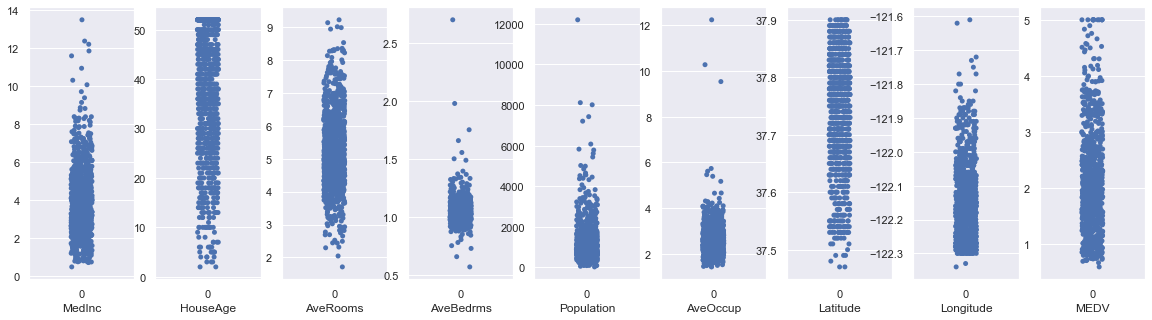

In [ ]:
plt.figure(figsize = (20, 5))

for i in range(1,10):
    plt.subplot(1,9,i)
    sns.stripplot(data = df.iloc[:1000,i-1])
    plt.xlabel(df.columns[i-1]);

## Violinplot

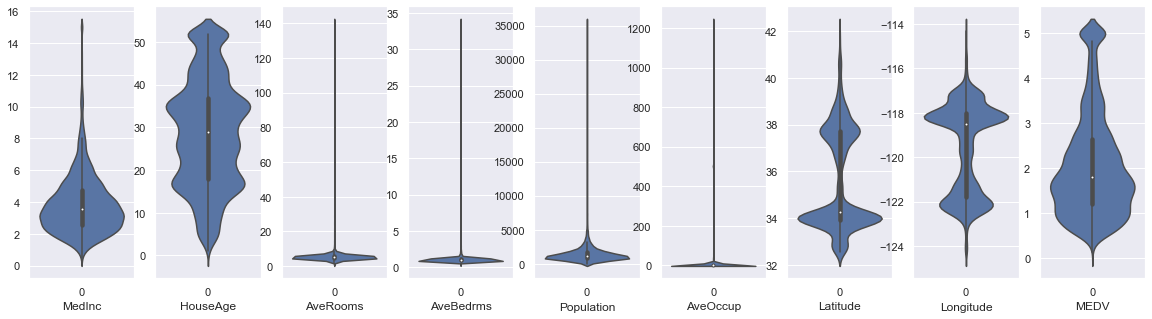

In [ ]:
plt.figure(figsize = (20, 5))

for i in range(1,10):
    plt.subplot(1,9, i)
    sns.violinplot(data = df.iloc[:,i-1])
    plt.xlabel(df.columns[i-1]);

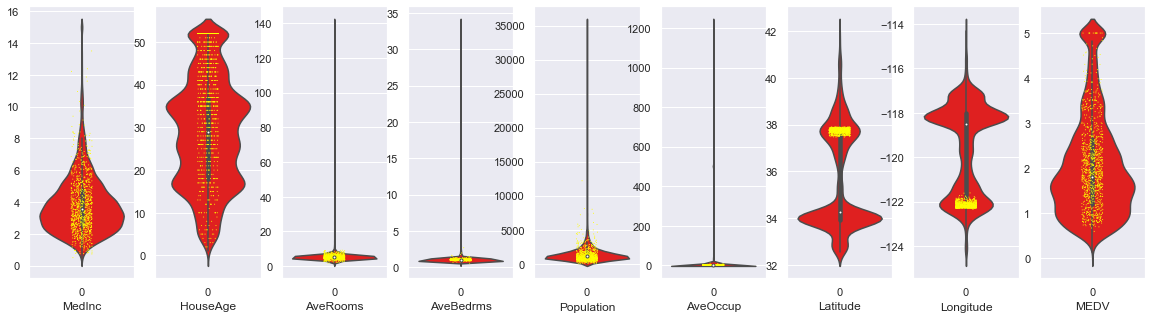

In [ ]:
plt.figure(figsize = (20, 5))

for i in range(1,10):
    plt.subplot(1,9, i)
    sns.stripplot(data = df.iloc[:1000,i-1], size=1, color='yellow')
    sns.violinplot(data = df.iloc[:,i-1], color='red')
    plt.xlabel(df.columns[i-1]);

## Correlation

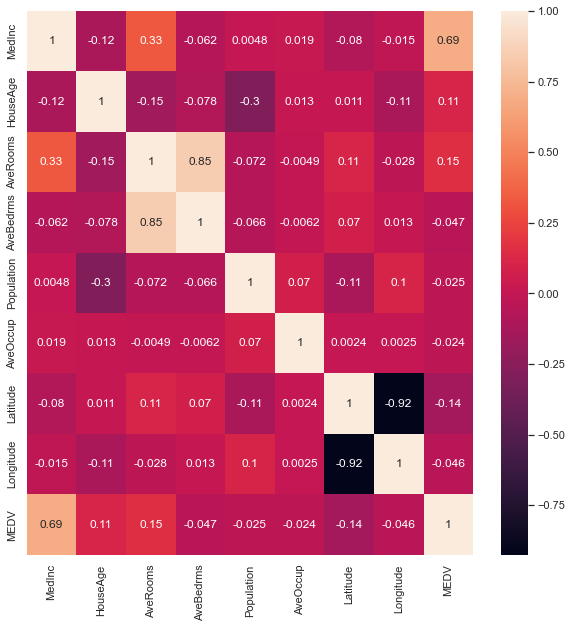

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
import numpy as np
np.ones_like(df.corr(), dtype=bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
 np.triu(np.ones_like(df.corr(), dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [ ]:
 np.triu(np.ones_like(df.corr(), dtype=bool))[1:,:-1]

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

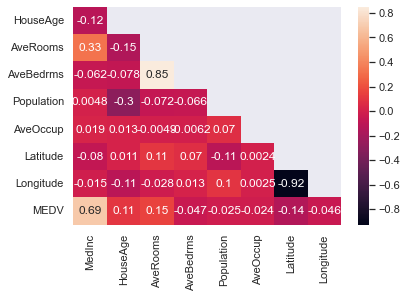

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr().iloc[1:,:-1], annot=True, mask=mask[1:,:-1]);
# heatmap: data will not be shown in cells where mask is True.

In [ ]:
def list_corr(dframe, method='pearson'):
    corr = dframe.corr(method)
    df_result = pd.DataFrame(columns=['Feature-1','Feature-2',method])
    s=0
    for i in range(corr.shape[1]-1):
        for j in range(i+1,corr.shape[1]):
            df_result.loc[s]=[corr.columns[i],corr.columns[j],round(corr.iloc[i,j],2)]
            s+=1
    return df_result

In [ ]:
list_corr(df, method='pearson').sort_values('pearson', ascending=False)

Feature-1   Feature-2  pearson
15    AveRooms   AveBedrms     0.85
7       MedInc        MEDV     0.69
1       MedInc    AveRooms     0.33
20    AveRooms        MEDV     0.15
18    AveRooms    Latitude     0.11
14    HouseAge        MEDV     0.11
28  Population   Longitude     0.10
26  Population    AveOccup     0.07
23   AveBedrms    Latitude     0.07
4       MedInc    AveOccup     0.02
12    HouseAge    Latitude     0.01
24   AveBedrms   Longitude     0.01
11    HouseAge    AveOccup     0.01
30    AveOccup    Latitude     0.00
17    AveRooms    AveOccup    -0.00
31    AveOccup   Longitude     0.00
3       MedInc  Population     0.00
22   AveBedrms    AveOccup    -0.01
29  Population        MEDV    -0.02
6       MedInc   Longitude    -0.02
32    AveOccup        MEDV    -0.02
19    AveRooms   Longitude    -0.03
25   AveBedrms        MEDV    -0.05
35   Longitude        MEDV    -0.05
2       MedInc   AveBedrms    -0.06
21   AveBedrms  Population    -0.07
16    AveRooms  Population    -0.07
9     HouseAge   AveBedrms    -0.08
5       MedInc    Latitude    -0.08
13    HouseAge   Longitude    -0.11
27  Population    Latitude    -0.11
0       MedInc    HouseAge    -0.12
34    Latitude        MEDV    -0.14
8     HouseAge    AveRooms    -0.15
10    HouseAge  Population    -0.30
33    Latitude   Longitude    -0.92

__Conclusion:__
- Strong positive correlation
    - AveRooms and AveBedrms	  
    - MedInc and MEDV
- Strong negative correlation  
    - Latitude, Longtitude
- In practice it is better to remove correlated features during feature selection.

## Pairplot

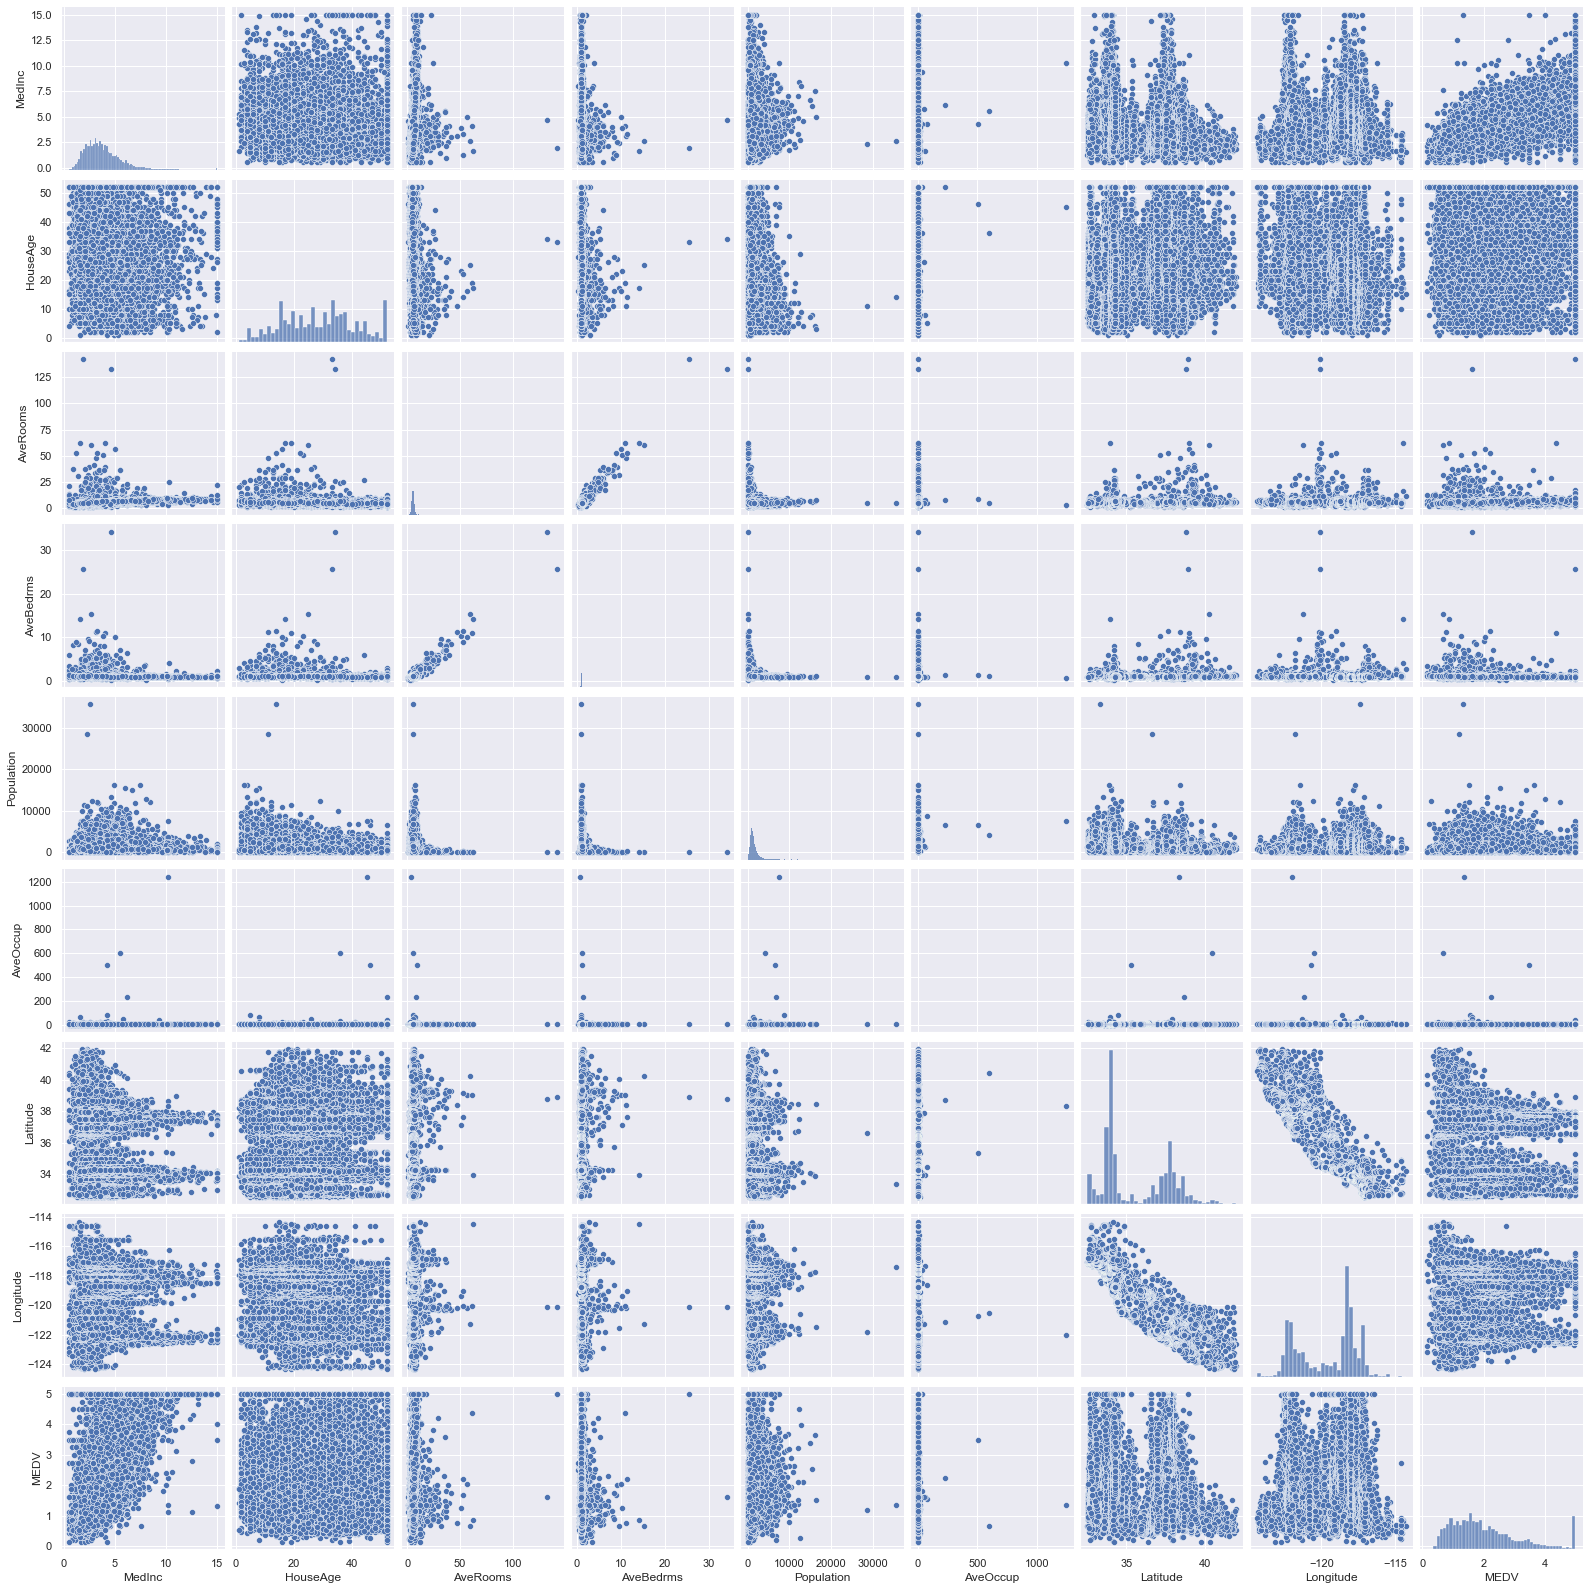

In [ ]:
sns.pairplot(df);

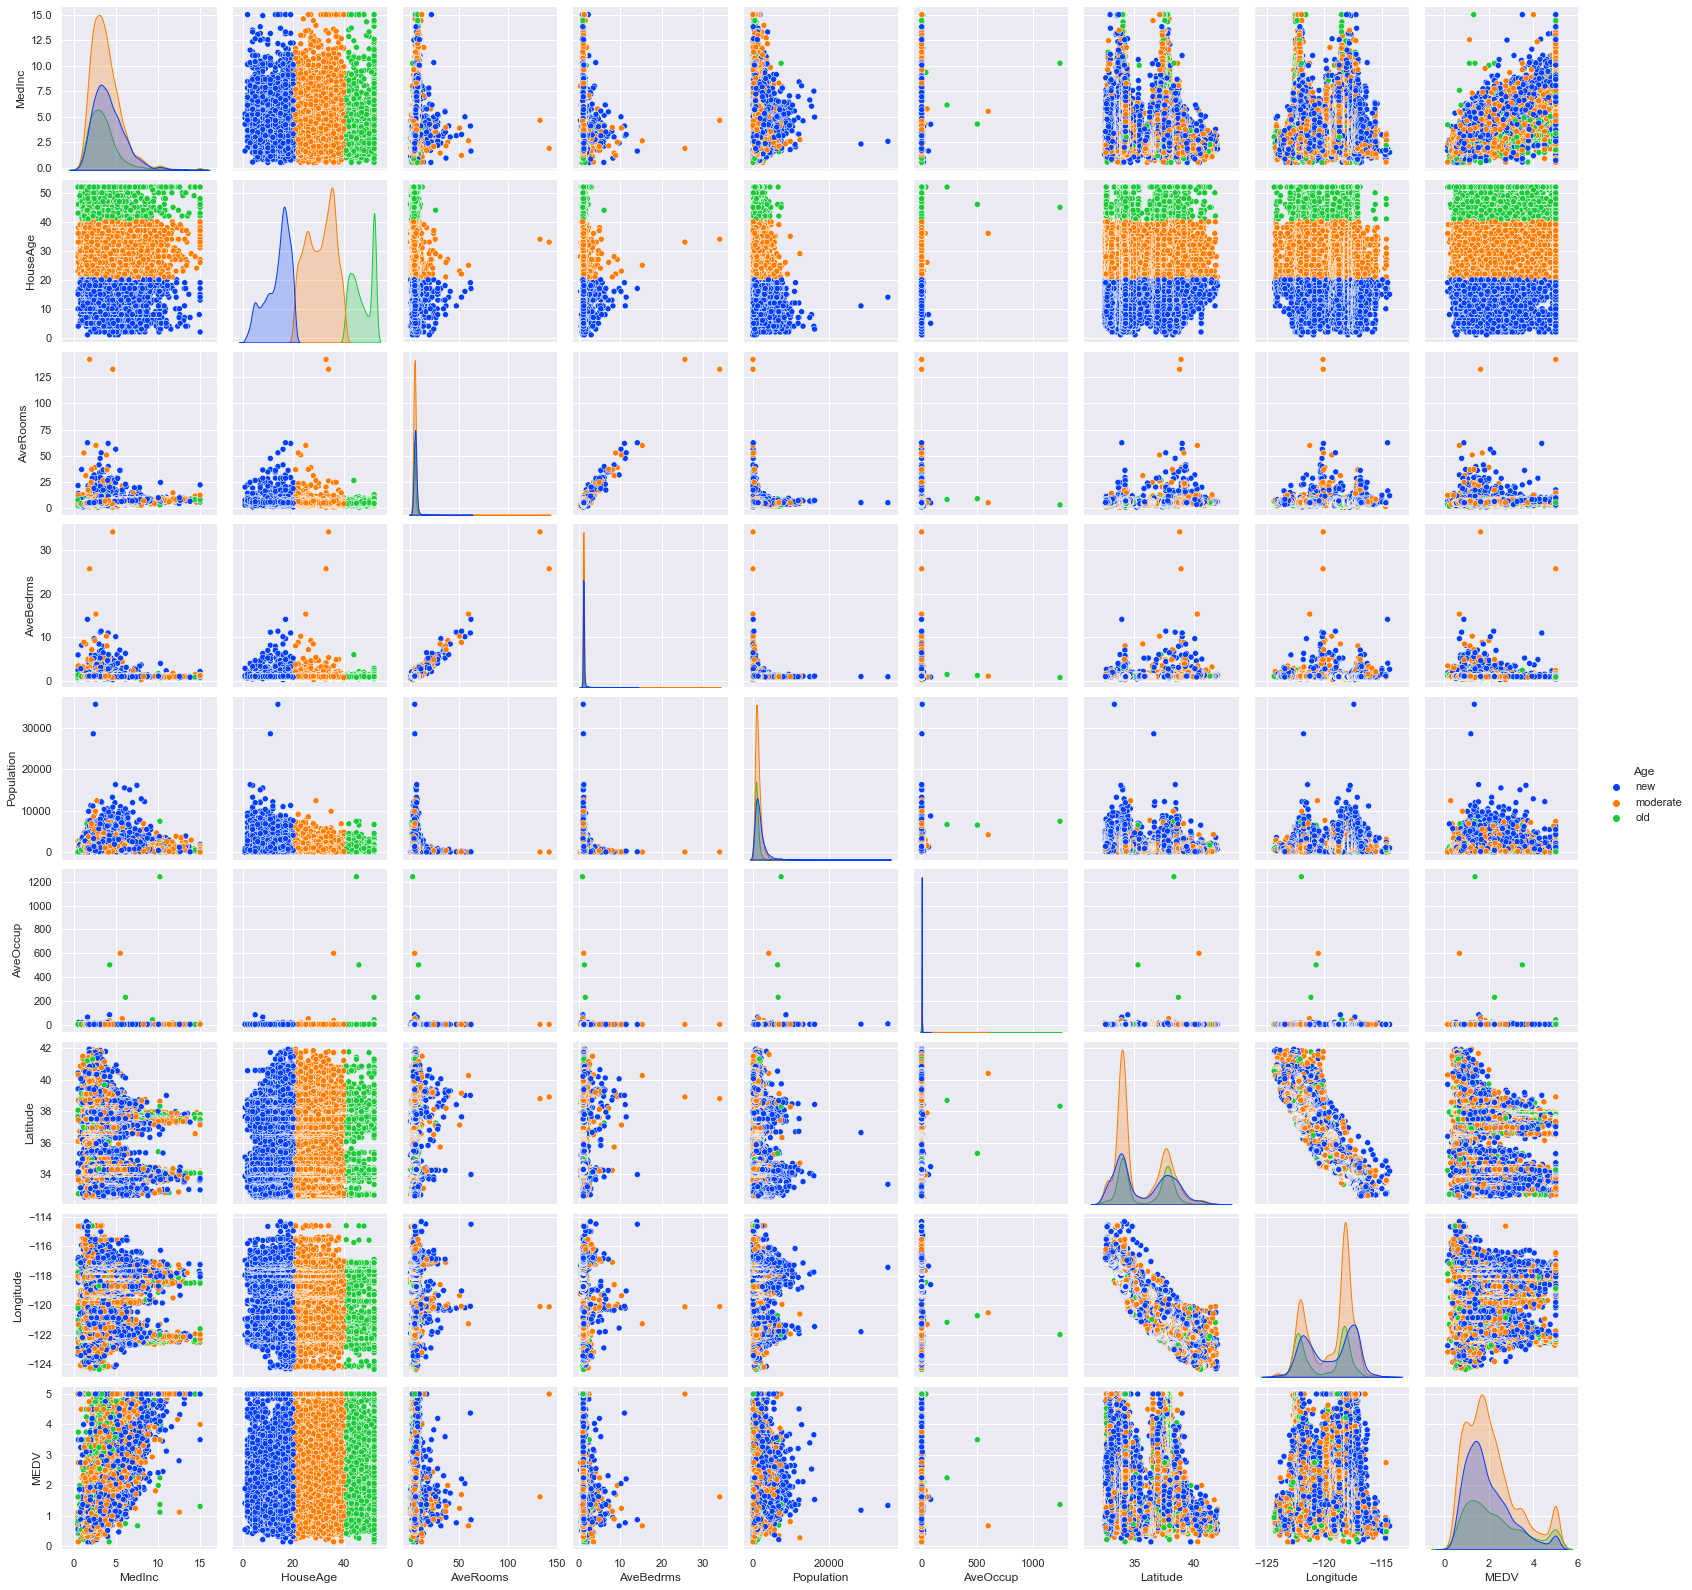

In [ ]:
sns.pairplot(df, hue='Age', diag_kind='kde', palette='bright');

## Scatter Plot

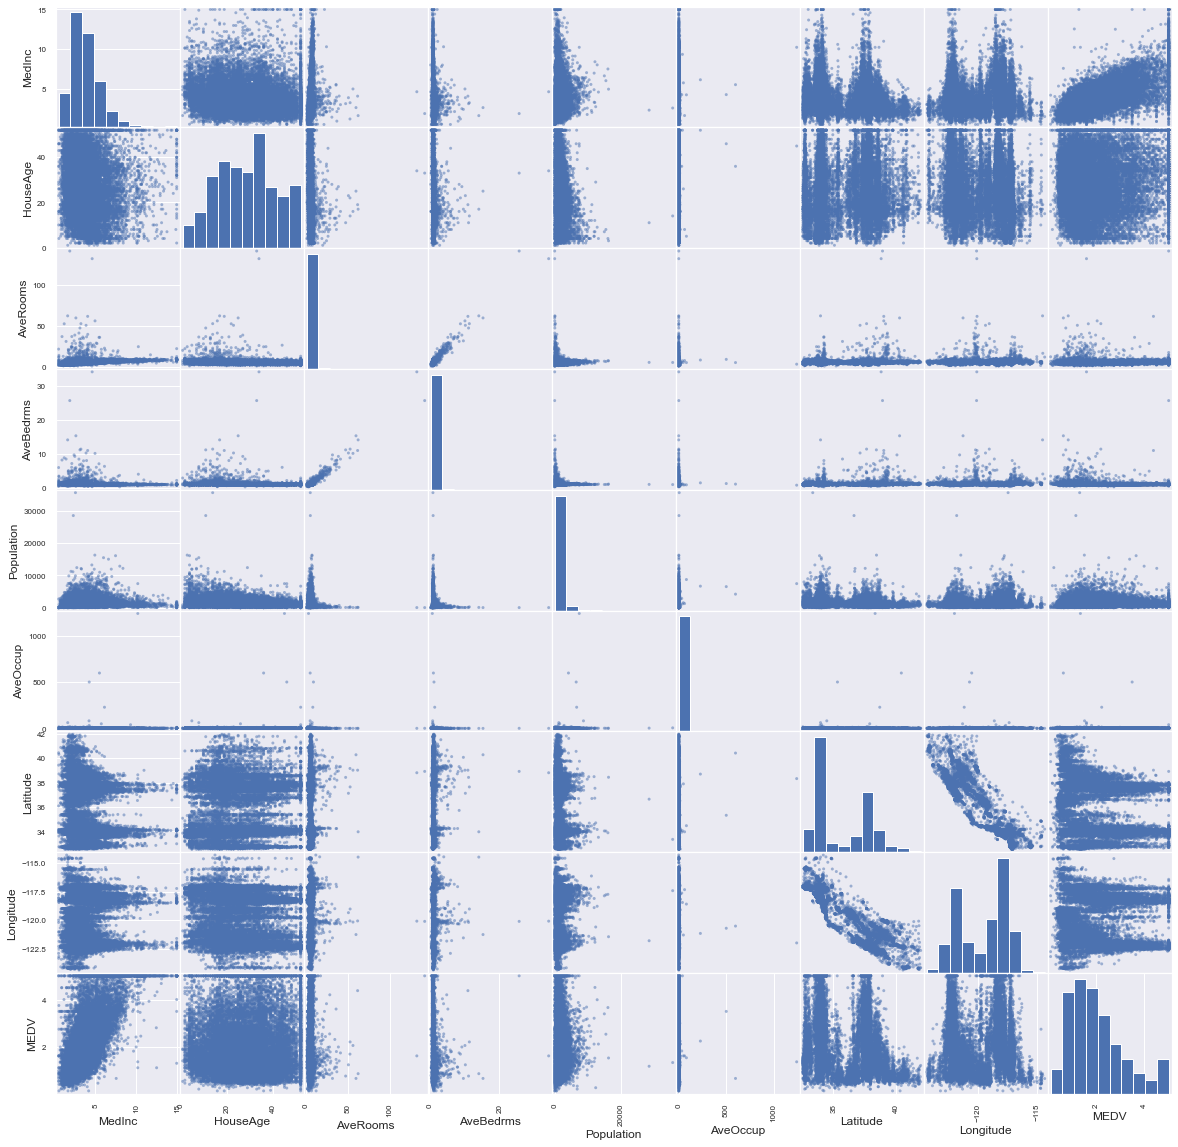

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

__CONCLUSION:__  
- To most promissing attribute to predict the MEDV are MedInc.
- There is a linear relation between MEDV andMedInc.

In [ ]:
# Work on the correlations of MEDV with other attributes
df.corr()['MEDV'].sort_values(ascending=False)

MEDV          1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MEDV, dtype: float64

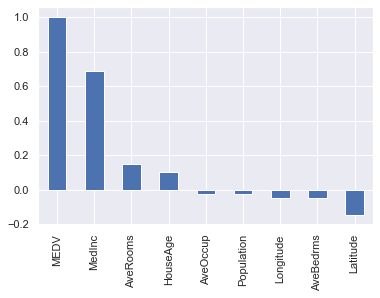

In [ ]:
df.corr()['MEDV'].sort_values(ascending=False).plot(kind='bar');

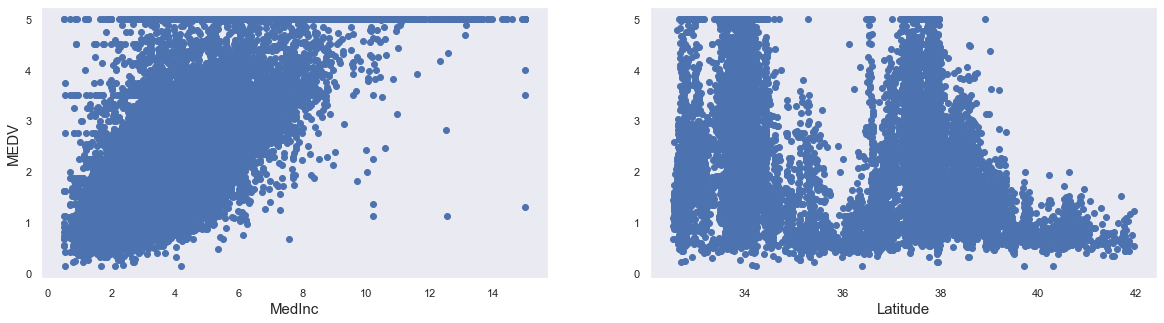

In [ ]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.ylabel('MEDV',fontsize=15)
plt.xlabel('MedInc',fontsize=15)
plt.scatter(df['MedInc'],df['MEDV']);
plt.grid()

plt.subplot(1, 2, 2)
plt.ylabel('',fontsize=15)
plt.xlabel('Latitude',fontsize=15)
plt.scatter(df['Latitude'],df['MEDV']);
plt.grid()

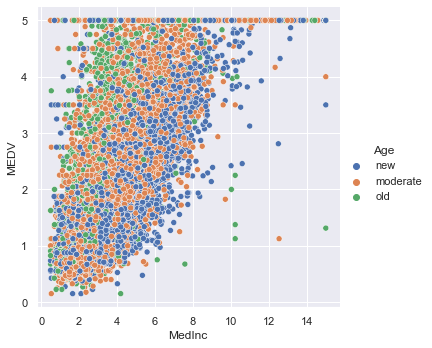

In [ ]:
sns.relplot(x='MedInc', y='MEDV', hue='Age', data=df);

In [ ]:
df.groupby('Age').mean()

MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
Age                                                                         
new       4.146255  13.814079  5.949127   1.151203  1805.961068  2.901279   
moderate  3.818965  30.703983  5.290374   1.078408  1350.814882  3.073268   
old       3.563053  47.124033  4.959200   1.057503  1009.604435  3.338455   

           Latitude   Longitude      MEDV  
Age                                        
new       35.795211 -119.466639  1.934459  
moderate  35.432751 -119.437351  2.067268  
old       35.904304 -120.094252  2.289650

__CONCLUSION:__
- MEDV increases as MedInc increases  (More income implies More Affordable houses)
- There is a horizontal linear line when MEDV=5. It is better to remove these houses to improve learning of algorithm.
  There are 27 such houses.

In [ ]:
df[df['MEDV']==5].shape

(27, 10)

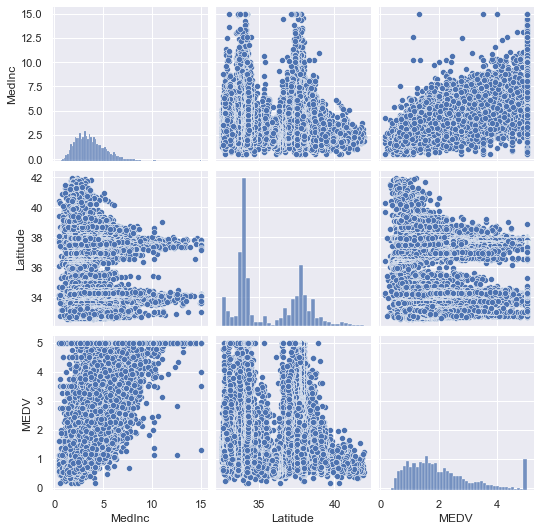

In [ ]:
sns.pairplot(df[['MedInc','Latitude','MEDV']]);